In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
from SBR import sosf,acf,ps,sosfnorm,sosfw,sosfw2

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

In [2]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
lr=[6562.8,6548,6583,6717,6731]#AngstromsR
lb=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=65
max0=145

In [3]:
inputf='604.Isis.WHT.Red.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [4]:
for i in 0,2,4:
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lr[Nx])/lr[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataI'+str(int(lr[Nx]))+'.csv')

In [5]:
datap='dataI6562.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,600.000000,600.000000,600.000000,600.000000
mean,105.269000,9.390000,-250.043594,2277.239467
std,23.243169,6.256047,10.420092,3750.107456
min,65.710000,0.000000,-277.593319,27.150000
25%,85.485000,4.000000,-257.836471,281.925000
50%,105.270000,9.000000,-249.888052,1017.500000
75%,125.045000,15.000000,-244.018098,2403.500000
max,144.830000,19.600000,-205.463695,30960.000000


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


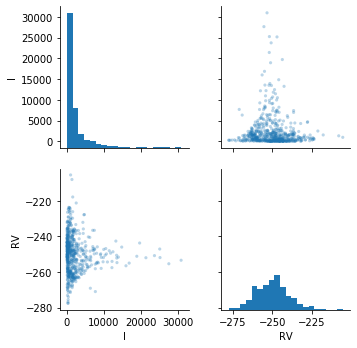

In [6]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [7]:
dataH=dt.copy()

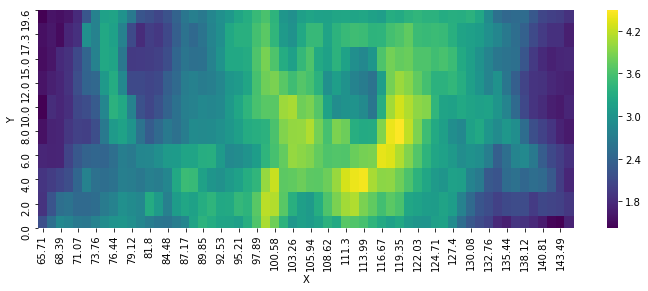

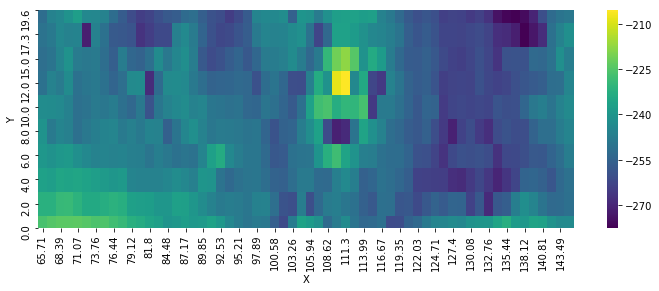

In [8]:
datal=dt.copy()
datal.I=np.log10(datal.I)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()

datal=dt.copy()
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()



/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:219: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:228: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:662: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:671: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD

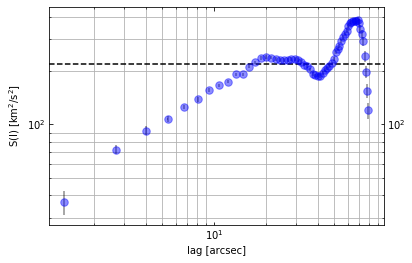

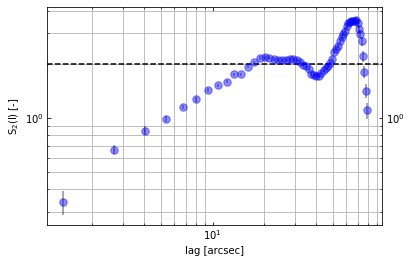

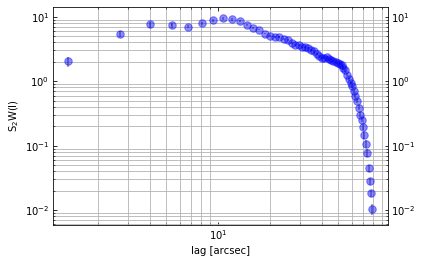

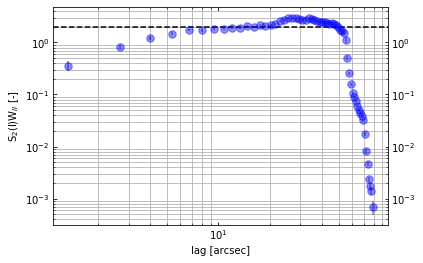

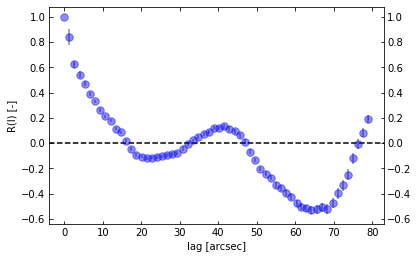

In [9]:
sfH00=sosf(dt)
sfnH00=sosfnorm(dt)
sfwH00=sosfw(dt)
sfw2H00=sosfw2(dt)
afH00=acf(dt)
#psH00=ps(dt)

In [10]:
datap='dataI6583.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,600.000000,600.000000,600.000000,600.000000
mean,105.269000,9.390000,-224.950913,333.340168
std,23.243169,6.256047,30.938421,440.691257
min,65.710000,0.000000,-271.562197,7.410000
25%,85.485000,4.000000,-236.644094,65.727500
50%,105.270000,9.000000,-229.642258,192.300000
75%,125.045000,15.000000,-221.934545,413.950000
max,144.830000,19.600000,39.843065,3893.000000


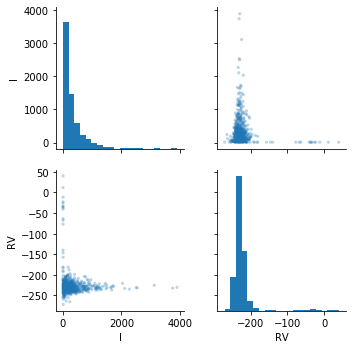

In [11]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [12]:
mrv=(dt.RV<-180)&(dt.RV>-300)
dt=dt[mrv]

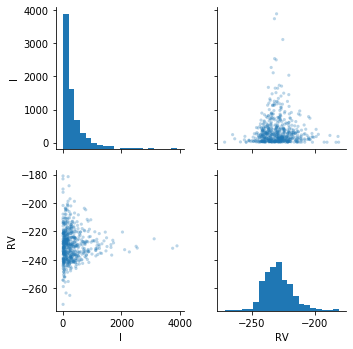

In [13]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [14]:
dataN=dt.copy()

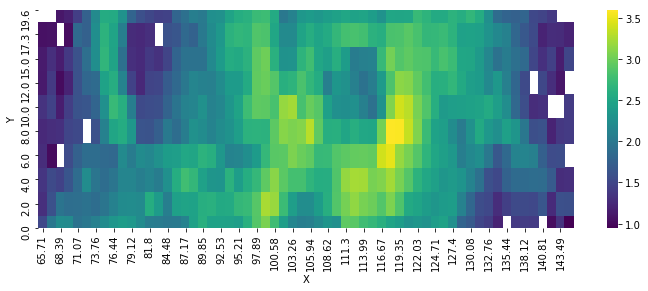

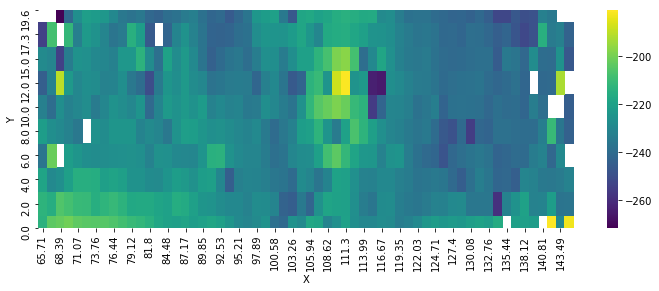

In [15]:
datal=dt.copy()
datal.I=np.log10(datal.I)
dataN_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataN_f, cmap="viridis")
plt.gca().invert_yaxis()

datal=dt.copy()
dataN_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataN_rv, cmap="viridis")
plt.gca().invert_yaxis()

In [16]:
dt.describe()

,X,Y,RV,I
count,585.000000,585.000000,585.000000,585.000000
mean,105.054667,9.328205,-229.337215,341.634084
std,22.813460,6.232340,11.534516,443.216317
min,65.710000,0.000000,-271.562197,8.969000
25%,85.820000,4.000000,-236.814871,71.710000
50%,104.600000,8.000000,-230.074891,200.700000
75%,124.710000,15.000000,-222.970589,423.500000
max,144.830000,19.600000,-180.982339,3893.000000


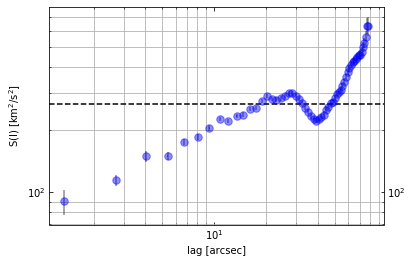

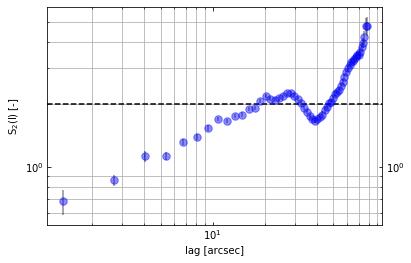

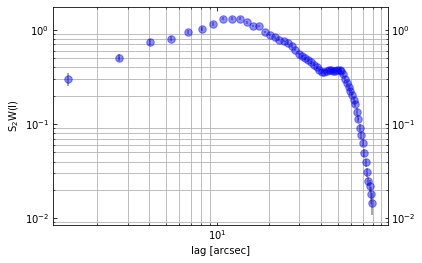

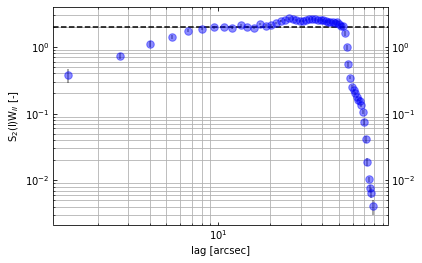

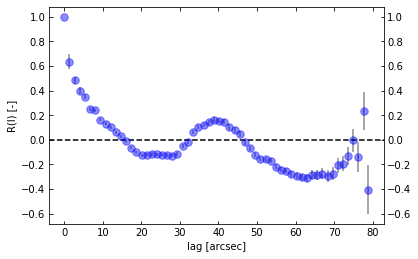

In [17]:
sfN00=sosf(dt)
sfnN00=sosfnorm(dt)
sfwN00=sosfw(dt)
sfw2N00=sosfw2(dt)
afN00=acf(dt)
#psN00=ps(dt)

In [18]:
datap='dataI6731.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,600.000000,600.000000,600.000000,600.000000
mean,105.269000,9.390000,-230.345848,168.994135
std,23.243169,6.256047,26.771015,201.362479
min,65.710000,0.000000,-337.580629,-1343.000000
25%,85.485000,4.000000,-240.808372,40.177500
50%,105.270000,9.000000,-233.915951,113.600000
75%,125.045000,15.000000,-227.034665,231.750000
max,144.830000,19.600000,44.520025,1568.000000


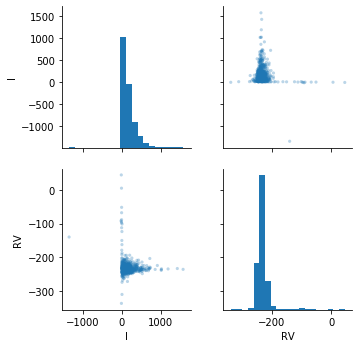

In [19]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [20]:
mrv=(dt.RV<-180)&(dt.RV>-250)
dt=dt[mrv]

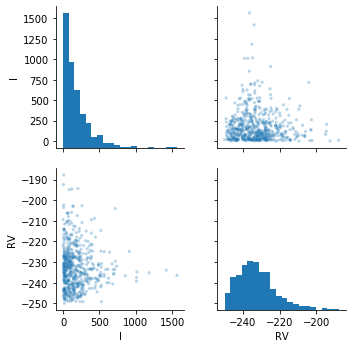

In [21]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [22]:
dataS=dt.copy()

/home/zalenovo/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


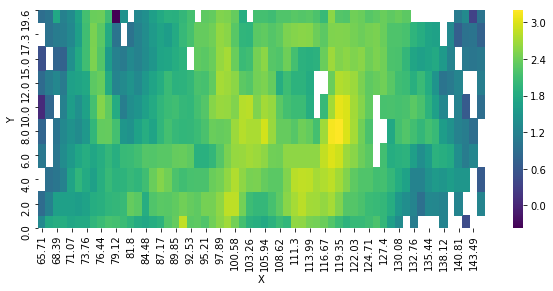

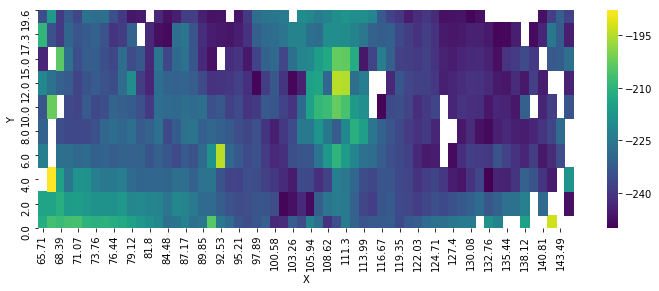

In [23]:
datal=dt.copy()
datal.I=np.log10(datal.I)
dataS_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(dataS_f, cmap="viridis")
plt.gca().invert_yaxis()

datal=dt.copy()
dataS_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataS_rv, cmap="viridis")
plt.gca().invert_yaxis()

In [24]:
dt.describe()

,X,Y,RV,I
count,558.000000,558.000000,558.000000,558.000000
mean,103.990484,9.347670,-232.460928,181.375309
std,22.486751,6.194706,10.532048,194.593189
min,65.710000,0.000000,-249.972285,-2.808000
25%,84.480000,4.000000,-240.151421,50.132500
50%,103.260000,8.000000,-233.670986,126.650000
75%,123.370000,15.000000,-227.123743,244.250000
max,144.830000,19.600000,-187.795747,1568.000000


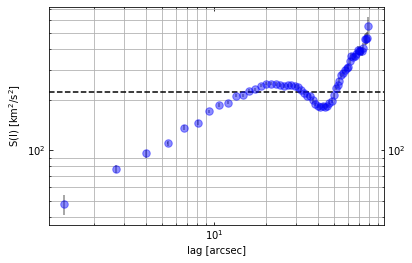

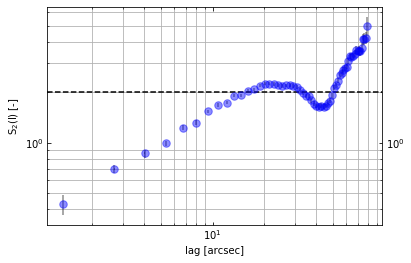

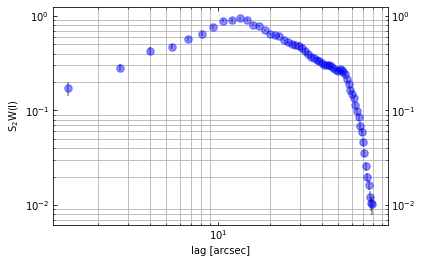

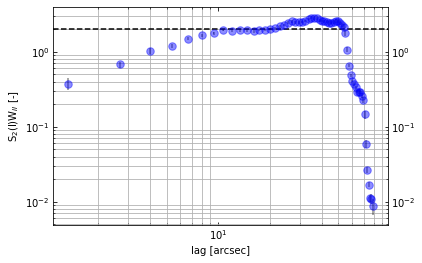

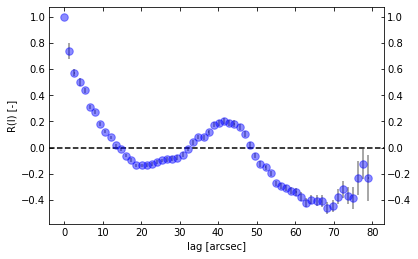

In [25]:
sfS00=sosf(dt)
sfnS00=sosfnorm(dt)
sfwS00=sosfw(dt)
sfw2S00=sosfw2(dt)
afS00=acf(dt)
#psS00=ps(dt)

In [26]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
#lr=[6562.8,6548,6583,6717,6731]#AngstromsR
lb=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=95
max0=135

inputf='604.Isis.WHT.Blue.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [27]:
for i in 0,2:
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lb[Nx])/lb[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataI'+str(int(lb[Nx]))+'.csv')

In [28]:
datap='dataI5006.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,280.000000,280.000000,280.000000,2.800000e+02
mean,115.147200,9.390000,-29724.197934,-1.053929e+18
std,11.575098,6.262024,90499.835640,1.763560e+19
min,95.836800,0.000000,-299766.779000,-2.951000e+20
25%,105.492000,4.000000,-236.217025,3.373500e+01
50%,115.147200,9.000000,-229.421115,7.487500e+01
75%,124.802400,15.000000,-221.742035,1.790250e+02
max,134.457600,19.600000,127916.931049,1.715000e+03


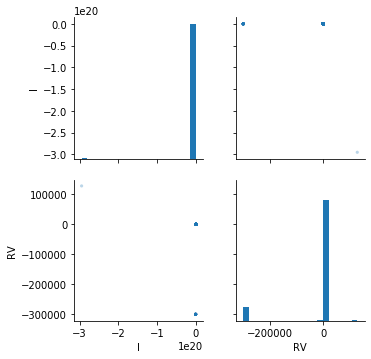

In [29]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [30]:
mrv=(dt.RV<-160)&(dt.RV>-260)
dt=dt[mrv]

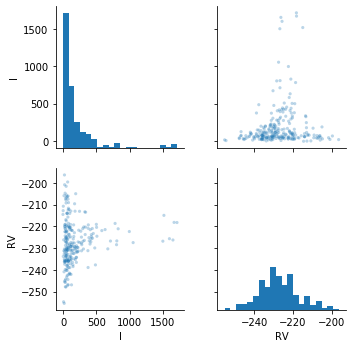

In [31]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [32]:
dataO=dt.copy()

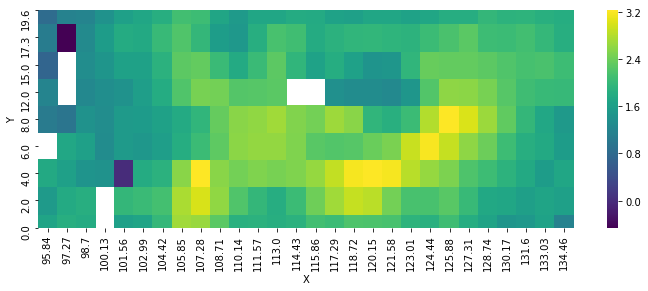

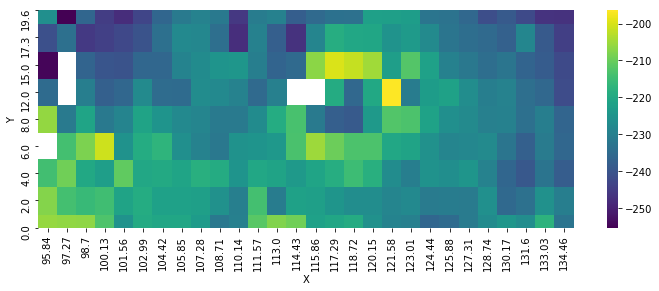

In [33]:
datal=dt.copy()
datal.I=np.log10(datal.I)
dataO_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataO_f, cmap="viridis")
plt.gca().invert_yaxis()

datal=dt.copy()
dataO_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataO_rv, cmap="viridis")
plt.gca().invert_yaxis()

In [34]:
dt.describe()

,X,Y,RV,I
count,247.000000,247.000000,247.000000,247.000000
mean,115.370157,9.280162,-227.184012,189.768723
std,11.514841,6.645376,10.169520,286.169387
min,95.836800,0.000000,-255.377301,-4.044000
25%,105.849600,4.000000,-234.001618,46.760000
50%,115.862400,8.000000,-227.714653,88.730000
75%,125.875200,15.000000,-221.098370,196.700000
max,134.457600,19.600000,-196.399576,1715.000000


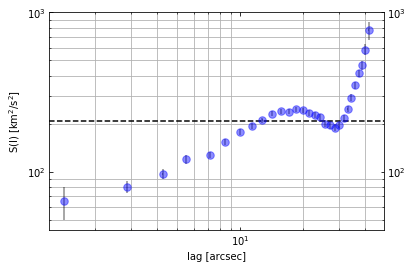

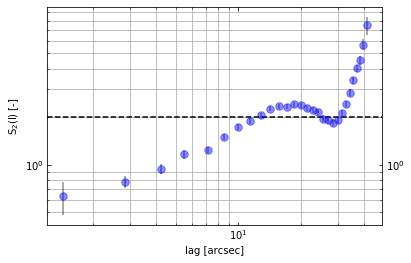

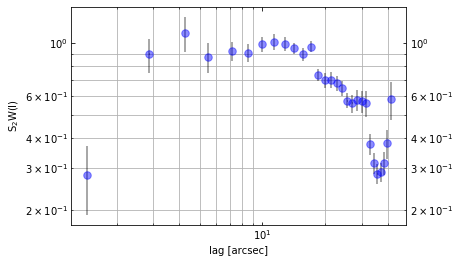

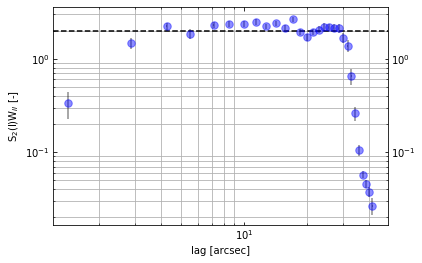

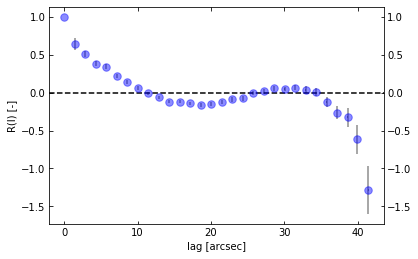

In [35]:
sfO00=sosf(dt)
sfnO00=sosfnorm(dt)
sfwO00=sosfw(dt)
sfw2O00=sosfw2(dt)
afO00=acf(dt)
#psS00=ps(dt)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


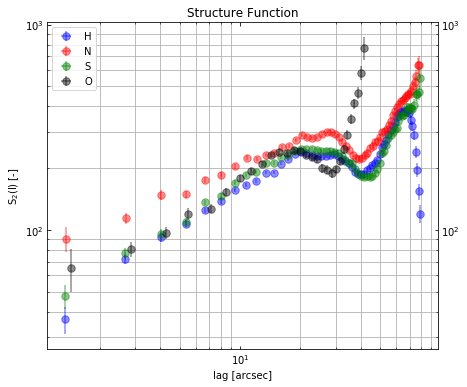

In [36]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfH00['Lag'],sfH00['Nmqvd'],xerr=sfH00.ErrX, yerr=sfH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='H')
ax.errorbar(sfN00['Lag'],sfN00['Nmqvd'],xerr=sfN00.ErrX, yerr=sfN00.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='N')
ax.errorbar(sfS00['Lag'],sfS00['Nmqvd'],xerr=sfS00.ErrX, yerr=sfS00.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='S')
ax.errorbar(sfO00['Lag'],sfO00['Nmqvd'],xerr=sfO00.ErrX, yerr=sfO00.ErrY, fmt="o",color='k', ecolor='k', alpha=0.45, markersize=7.5, label='O')
#ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Structure Function')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


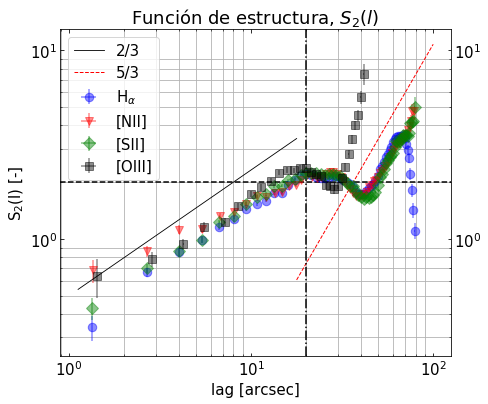

In [37]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfnH00['Lag'],sfnH00['Nmqvd'],xerr=sfnH00.ErrX, yerr=sfnH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=8.5, label=r'H$_{\alpha}$')
ax.errorbar(sfnN00['Lag'],sfnN00['Nmqvd'],xerr=sfnN00.ErrX, yerr=sfnN00.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=8.5, label='[NII]')
ax.errorbar(sfnS00['Lag'],sfnS00['Nmqvd'],xerr=sfnS00.ErrX, yerr=sfnS00.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=8.5, label='[SII]')
ax.errorbar(sfnO00['Lag'],sfnO00['Nmqvd'],xerr=sfnO00.ErrX, yerr=sfnO00.ErrY, fmt="s",color='k', ecolor='k', alpha=0.45, markersize=8.5, label='[OIII]')
#ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
sgrid = np.logspace(.05, 1.25)
ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.85, label='2/3')
sgrid2 = np.logspace(1.25, 2)
ax.plot(sgrid2, 0.005*sgrid2**(5/3), color="r", lw=1, label='5/3', linestyle='--')
ax.axvline(x=20, color='k', linestyle='-.')


ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


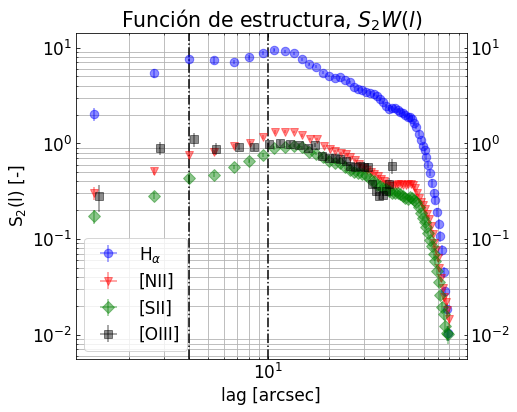

In [38]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfwH00['Lag'],sfwH00['Nmqvd'],xerr=sfwH00.ErrX, yerr=sfwH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=8.5, label=r'H$_{\alpha}$')
ax.errorbar(sfwN00['Lag'],sfwN00['Nmqvd'],xerr=sfwN00.ErrX, yerr=sfwN00.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=8.5, label='[NII]')
ax.errorbar(sfwS00['Lag'],sfwS00['Nmqvd'],xerr=sfwS00.ErrX, yerr=sfwS00.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=8.5, label='[SII]')
ax.errorbar(sfwO00['Lag'],sfwO00['Nmqvd'],xerr=sfwO00.ErrX, yerr=sfwO00.ErrY, fmt="s",color='k', ecolor='k', alpha=0.45, markersize=8.5, label='[OIII]')
#ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
ax.axvline(x=4, color='k', linestyle='-.')
ax.axvline(x=10, color='k', linestyle='-.')

ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Función de estructura, $S_{2}W(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

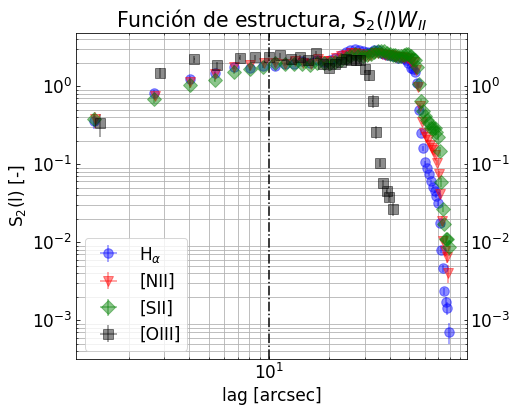

In [39]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfw2H00['Lag'],sfw2H00['Nmqvd'],xerr=sfw2H00.ErrX, yerr=sfw2H00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=9.5, label=r'H$_{\alpha}$')
ax.errorbar(sfw2N00['Lag'],sfw2N00['Nmqvd'],xerr=sfw2N00.ErrX, yerr=sfw2N00.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='[NII]')
ax.errorbar(sfw2S00['Lag'],sfw2S00['Nmqvd'],xerr=sfw2S00.ErrX, yerr=sfw2S00.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='[SII]')
ax.errorbar(sfw2O00['Lag'],sfw2O00['Nmqvd'],xerr=sfw2O00.ErrX, yerr=sfw2O00.ErrY, fmt="s",color='k', ecolor='k', alpha=0.45, markersize=9.5, label='[OIII]')
#ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#ax.axvline(x=5, color='k', linestyle='-.')
ax.axvline(x=10, color='k', linestyle='-.')

#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Función de estructura, $S_{2}(l)W_{II}$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower left')
plt.grid(which='minor')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

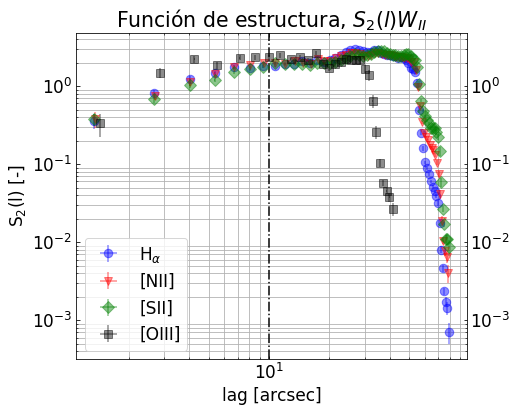

In [40]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfw2H00['Lag'],sfw2H00['Nmqvd'],xerr=sfw2H00.ErrX, yerr=sfw2H00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=8.5, label=r'H$_{\alpha}$')
ax.errorbar(sfw2N00['Lag'],sfw2N00['Nmqvd'],xerr=sfw2N00.ErrX, yerr=sfw2N00.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=8.5, label='[NII]')
ax.errorbar(sfw2S00['Lag'],sfw2S00['Nmqvd'],xerr=sfw2S00.ErrX, yerr=sfw2S00.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=8.5, label='[SII]')
ax.errorbar(sfw2O00['Lag'],sfw2O00['Nmqvd'],xerr=sfw2O00.ErrX, yerr=sfw2O00.ErrY, fmt="s",color='k', ecolor='k', alpha=0.45, markersize=8.5, label='[OIII]')
#ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
ax.axvline(x=10, color='k', linestyle='-.')

#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Función de estructura, $S_{2}(l)W_{II}$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower left')
plt.grid(which='minor')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

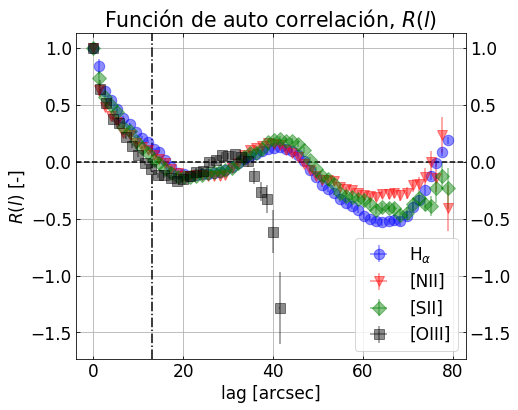

In [41]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(afH00['Lag'],afH00['Nmqvd'],xerr=afH00.ErrX, yerr=afH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=10.5, label=r'H$_{\alpha}$')
ax.errorbar(afN00['Lag'],afN00['Nmqvd'],xerr=afN00.ErrX, yerr=afN00.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=10.5, label='[NII]')
ax.errorbar(afS00['Lag'],afS00['Nmqvd'],xerr=afS00.ErrX, yerr=afS00.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=10.5, label='[SII]')
ax.errorbar(afO00['Lag'],afO00['Nmqvd'],xerr=afO00.ErrX, yerr=afO00.ErrY, fmt="s",color='k', ecolor='k', alpha=0.45, markersize=10.5, label='[OIII]')
ax.axhline(y=0, color='k', linestyle='--')
ax.axvline(x=13, color='k', linestyle='-.')

ax.set(xlabel='lag [arcsec]', ylabel='$R(l)$ [-]')
plt.title('Función de auto correlación, $R(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower right')
plt.grid(which='major')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

In [42]:
histH=dataH.RV-dataH.RV.mean()
histN=dataN.RV-dataN.RV.mean()
histS=dataS.RV-dataS.RV.mean()
histO=dataO.RV-dataO.RV.mean()

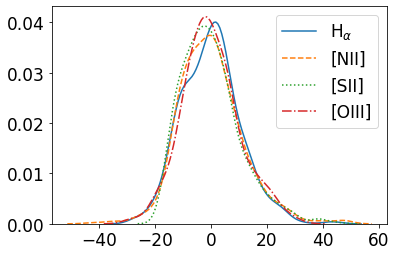

In [43]:
sns.kdeplot(histH, label=r'H$_{\alpha}$')
sns.kdeplot(histN, label='[NII]', linestyle='--')
sns.kdeplot(histS, label='[SII]', linestyle=':')
sns.kdeplot(histO, label='[OIII]',linestyle='-.')


In [44]:
sfnH00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,0.339167,0.050981,1.169239,1.367121,1.340000,527.0,6.016082e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,0.665344,0.038362,1.687923,2.849084,2.680000,1937.0,6.862265e-03,0.972105,1.287974,0.684402,0.981493,0.142315
2,4.020000,0.850867,0.047591,2.079891,4.325947,4.020000,1911.0,8.921643e-03,0.851731,1.035010,0.657349,0.848030,0.089028
3,5.360000,0.988290,0.040053,2.281282,5.204249,5.360000,3245.0,6.993702e-03,0.778723,0.917626,0.640612,0.778987,0.065293
4,6.700000,1.150800,0.032858,2.203697,4.856279,6.700000,4499.0,6.495173e-03,0.746985,0.877797,0.654090,0.759624,0.052980
5,8.040000,1.275743,0.039023,2.391590,5.719705,8.040000,3757.0,6.395521e-03,0.723127,0.847106,0.643888,0.738040,0.048284
6,9.380000,1.440102,0.033160,2.376902,5.649662,9.380000,5139.0,5.886989e-03,0.713687,0.838492,0.659150,0.737110,0.043339
7,10.720000,1.525673,0.032478,2.431951,5.914386,10.720000,5608.0,5.048444e-03,0.700196,0.811588,0.645436,0.719074,0.039914
8,12.060000,1.598084,0.034141,2.623999,6.885370,12.060000,5908.0,5.215092e-03,0.685189,0.789221,0.631906,0.702105,0.037717
9,13.395895,1.754923,0.035999,2.791042,7.789914,13.395895,6012.0,5.522569e-03,0.678967,0.793510,0.644113,0.705530,0.036845


In [45]:
sfnN00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.350000,0.680658,0.093841,2.168508,4.702428,1.350000,535.0,0.000096,0.000000,inf,-inf,NaN,NaN
1,2.690000,0.857652,0.054507,2.383380,5.680498,2.690000,1913.0,0.005568,0.335258,0.639799,0.052682,0.342579,0.138417
2,4.030000,1.120296,0.063996,2.872722,8.252534,4.030000,2016.0,0.007559,0.442716,0.642052,0.283736,0.456168,0.084634
3,5.370000,1.121737,0.050225,2.828253,7.999017,5.370000,3172.0,0.007063,0.392424,0.500985,0.235102,0.376170,0.063020
4,6.710000,1.319651,0.044294,2.933449,8.605125,6.710000,4387.0,0.006398,0.406998,0.525991,0.311050,0.414680,0.050759
5,8.077184,1.393859,0.045060,2.967487,8.805980,8.077184,4338.0,0.006277,0.406527,0.501378,0.310102,0.406002,0.045085
6,9.397473,1.536347,0.043952,3.054561,9.330342,9.397473,4831.0,0.006188,0.415575,0.510559,0.338046,0.421393,0.040731
7,10.782490,1.694968,0.040564,3.051715,9.312966,10.782490,5661.0,0.005493,0.429680,0.521872,0.365278,0.438943,0.037103
8,12.080236,1.666297,0.041195,3.094545,9.576211,12.080236,5644.0,0.005429,0.425902,0.487376,0.338180,0.417153,0.035347
9,13.479054,1.748262,0.039176,3.071020,9.431162,13.479054,6146.0,0.005821,0.423656,0.484055,0.343975,0.417229,0.033121


In [46]:
sfnS00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,0.428959,0.056920,1.232681,1.519502,1.340000,470.0,5.200370e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,0.697763,0.040330,1.676992,2.812301,2.680000,1730.0,7.220151e-03,0.701897,0.988349,0.436246,0.708831,0.130163
2,4.020000,0.862232,0.046928,1.939451,3.761471,4.020000,1709.0,9.406965e-03,0.642646,0.813320,0.471141,0.642369,0.080652
3,5.360000,0.991565,0.039170,2.106113,4.435711,5.360000,2892.0,7.398922e-03,0.607689,0.735074,0.485481,0.609415,0.058834
4,6.700000,1.229438,0.037780,2.397453,5.747782,6.700000,4028.0,6.884000e-03,0.628706,0.761496,0.557426,0.649209,0.048823
5,8.040000,1.316970,0.043470,2.515617,6.328331,8.040000,3350.0,6.779575e-03,0.623042,0.723627,0.537776,0.628148,0.043855
6,9.380000,1.537385,0.040661,2.746959,7.545783,9.380000,4565.0,6.214854e-03,0.635393,0.742554,0.578174,0.652040,0.039336
7,10.720000,1.677861,0.040404,2.850435,8.124980,10.720000,4978.0,5.370831e-03,0.642906,0.735809,0.584263,0.654326,0.036023
8,12.060000,1.736044,0.040964,2.976561,8.859913,12.060000,5281.0,5.493829e-03,0.639706,0.711665,0.568684,0.640018,0.033701
9,13.395895,1.904647,0.042153,3.092431,9.563130,13.395895,5383.0,5.841733e-03,0.641797,0.718828,0.583645,0.648090,0.031967


In [47]:
sfnO00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.430400,0.632288,0.147587,1.497845,2.243539,1.430400,104.0,0.000000,0.000000,inf,-inf,NaN,NaN
1,2.860800,0.782249,0.069491,1.556971,2.424160,2.860800,503.0,0.011403,0.307046,0.813318,-0.129831,0.330178,0.222503
2,4.248064,0.939105,0.062326,1.695447,2.874541,4.248064,741.0,0.013462,0.357029,0.666648,0.107598,0.377091,0.132024
3,5.489631,1.159706,0.076788,2.094506,4.386955,5.489631,745.0,0.009098,0.431187,0.696333,0.244092,0.457204,0.107122
4,7.144651,1.233488,0.059697,2.156549,4.650704,7.144651,1306.0,0.011499,0.434549,0.610125,0.254201,0.432958,0.083895
5,8.503594,1.488989,0.061062,2.266705,5.137951,8.503594,1379.0,0.010743,0.472212,0.652167,0.339317,0.487899,0.074017
6,10.007552,1.731771,0.073458,2.730818,7.457368,10.007552,1383.0,0.010235,0.510526,0.675912,0.387801,0.524746,0.068156
7,11.390173,1.877865,0.076028,2.792415,7.797582,11.390173,1350.0,0.010699,0.534961,0.671895,0.403619,0.536825,0.063238
8,12.816246,2.038413,0.068679,2.868121,8.226119,12.816246,1745.0,0.009690,0.553380,0.670174,0.422536,0.548697,0.058400
9,14.260940,2.242115,0.071121,3.134188,9.823136,14.260940,1943.0,0.009523,0.571287,0.679636,0.445216,0.565380,0.055306


In [48]:
sfnO00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.430400,0.632288,0.147587,1.497845,2.243539,1.430400,104.0,0.000000,0.000000,inf,-inf,NaN,NaN
1,2.860800,0.782249,0.069491,1.556971,2.424160,2.860800,503.0,0.011403,0.307046,0.813318,-0.129831,0.330178,0.222503
2,4.248064,0.939105,0.062326,1.695447,2.874541,4.248064,741.0,0.013462,0.357029,0.666648,0.107598,0.377091,0.132024
3,5.489631,1.159706,0.076788,2.094506,4.386955,5.489631,745.0,0.009098,0.431187,0.696333,0.244092,0.457204,0.107122
4,7.144651,1.233488,0.059697,2.156549,4.650704,7.144651,1306.0,0.011499,0.434549,0.610125,0.254201,0.432958,0.083895
5,8.503594,1.488989,0.061062,2.266705,5.137951,8.503594,1379.0,0.010743,0.472212,0.652167,0.339317,0.487899,0.074017
6,10.007552,1.731771,0.073458,2.730818,7.457368,10.007552,1383.0,0.010235,0.510526,0.675912,0.387801,0.524746,0.068156
7,11.390173,1.877865,0.076028,2.792415,7.797582,11.390173,1350.0,0.010699,0.534961,0.671895,0.403619,0.536825,0.063238
8,12.816246,2.038413,0.068679,2.868121,8.226119,12.816246,1745.0,0.009690,0.553380,0.670174,0.422536,0.548697,0.058400
9,14.260940,2.242115,0.071121,3.134188,9.823136,14.260940,1943.0,0.009523,0.571287,0.679636,0.445216,0.565380,0.055306


In [49]:
sfwH00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,2.026972,0.334123,7.663014,58.721780,1.340000,527.0,6.016082e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,5.409740,0.608439,26.771294,716.702187,2.680000,1937.0,6.862265e-03,1.416233,1.829874,1.023969,1.423359,0.189976
2,4.020000,7.606401,0.812034,35.488775,1259.453173,4.020000,1911.0,8.921643e-03,1.226625,1.460034,0.962094,1.216251,0.117442
3,5.360000,7.338476,0.601251,34.244927,1172.715004,5.360000,3245.0,6.993702e-03,0.981386,1.114818,0.756349,0.950851,0.085407
4,6.700000,7.038579,0.360140,24.153543,583.393620,6.700000,4499.0,6.495173e-03,0.798751,0.916403,0.646038,0.787064,0.063904
5,8.040000,7.966263,0.470754,28.850700,832.362873,8.040000,3757.0,6.395521e-03,0.714898,0.896446,0.644717,0.752020,0.061238
6,9.380000,8.841167,0.472760,33.887395,1148.355525,9.380000,5139.0,5.886989e-03,0.671334,0.876247,0.650255,0.732612,0.058849
7,10.720000,9.496729,0.449088,33.627675,1130.820559,10.720000,5608.0,5.048444e-03,0.642880,0.851546,0.646029,0.713485,0.056368
8,12.060000,9.118576,0.391062,30.055833,903.353082,12.060000,5908.0,5.215092e-03,0.603701,0.785488,0.595003,0.661397,0.050701
9,13.395895,8.699656,0.352712,27.346009,747.804225,13.395895,6012.0,5.522569e-03,0.560119,0.728241,0.548487,0.612282,0.047419


In [50]:
sfwN00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.350000,0.299967,0.046361,1.071336,1.147761,1.350000,535.0,0.000096,0.000000,inf,-inf,NaN,NaN
1,2.690000,0.508861,0.041801,1.827792,3.340823,2.690000,1913.0,0.005568,0.766569,1.124596,0.433789,0.774985,0.162861
2,4.030000,0.747725,0.059014,2.649084,7.017645,4.030000,2016.0,0.007559,0.827793,1.058114,0.628562,0.838156,0.101335
3,5.370000,0.803550,0.050047,2.818217,7.942346,5.370000,3172.0,0.007063,0.747614,0.879015,0.562998,0.729876,0.074837
4,6.710000,0.943169,0.043259,2.864895,8.207624,6.710000,4387.0,0.006398,0.719765,0.847093,0.595516,0.720791,0.059299
5,8.077184,1.019666,0.049215,3.241114,10.504818,8.077184,4338.0,0.006277,0.690342,0.804156,0.575969,0.690156,0.053784
6,9.397473,1.155719,0.053989,3.752173,14.078799,9.397473,4831.0,0.006188,0.681071,0.805197,0.596417,0.694228,0.049502
7,10.782490,1.312756,0.053998,4.062432,16.503351,10.782490,5661.0,0.005493,0.683232,0.810663,0.621080,0.704992,0.045560
8,12.080236,1.320790,0.051732,3.886087,15.101672,12.080236,5644.0,0.005429,0.671141,0.770545,0.592591,0.678092,0.042040
9,13.479054,1.313611,0.044502,3.488509,12.169695,13.479054,6146.0,0.005821,0.650243,0.729268,0.564391,0.647967,0.038873


In [51]:
sfwS00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,0.172168,0.028932,0.625236,0.390920,1.340000,468.0,5.056330e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,0.284574,0.024634,1.022222,1.044938,2.680000,1723.0,7.241889e-03,0.724986,1.110186,0.370263,0.735145,0.174451
2,4.020000,0.429235,0.035116,1.447866,2.096315,4.020000,1701.0,9.433913e-03,0.820061,1.070578,0.612453,0.834364,0.108139
3,5.360000,0.471175,0.028529,1.531053,2.344123,5.360000,2881.0,7.412095e-03,0.758754,0.901343,0.569118,0.743072,0.078567
4,6.700000,0.571246,0.026775,1.695484,2.874665,6.700000,4011.0,6.898375e-03,0.748794,0.887971,0.618856,0.751874,0.063443
5,8.040000,0.649433,0.033637,1.943095,3.775619,8.040000,3338.0,6.795351e-03,0.741987,0.871828,0.624588,0.746134,0.058300
6,9.380000,0.760043,0.034321,2.313554,5.352534,9.380000,4545.0,6.229507e-03,0.749676,0.880334,0.659518,0.763176,0.052338
7,10.720000,0.892816,0.038127,2.684652,7.207356,10.720000,4959.0,5.383947e-03,0.767259,0.900101,0.695828,0.787729,0.048868
8,12.060000,0.908888,0.035668,2.585352,6.684046,12.060000,5255.0,5.502736e-03,0.764431,0.858457,0.668290,0.763726,0.044824
9,13.395895,0.940795,0.035569,2.603134,6.776307,13.395895,5357.0,5.855278e-03,0.755090,0.833672,0.653431,0.747398,0.042599


In [52]:
sfwO00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.430400,0.280676,0.088953,0.902779,0.815011,1.430400,104.0,0.000000,0.000000,inf,-inf,NaN,NaN
1,2.860800,0.895521,0.144496,3.214825,10.335099,2.860800,496.0,0.011532,1.673819,2.439511,1.022779,1.712036,0.334291
2,4.248064,1.099804,0.183184,4.942566,24.428958,4.248064,729.0,0.013583,1.302135,1.746329,0.834344,1.294269,0.214981
3,5.489631,0.874258,0.127136,3.444437,11.864144,5.489631,735.0,0.009195,0.928319,1.229154,0.523252,0.893575,0.166986
4,7.144651,0.925914,0.082099,2.945295,8.674763,7.144651,1288.0,0.011595,0.723049,1.031880,0.513197,0.756042,0.122994
5,8.503594,0.910675,0.081834,3.021219,9.127765,8.503594,1364.0,0.010792,0.594593,0.922386,0.453021,0.656667,0.113496
6,10.007552,0.985225,0.071301,2.640066,6.969950,10.007552,1372.0,0.010275,0.525845,0.877302,0.465329,0.622826,0.104864
7,11.390173,1.009732,0.080445,2.940364,8.645739,11.390173,1337.0,0.010764,0.478328,0.837694,0.444340,0.586787,0.102745
8,12.816246,0.993426,0.064736,2.690266,7.237533,12.816246,1728.0,0.009735,0.435746,0.779036,0.420143,0.544975,0.095626
9,14.260940,0.950035,0.050071,2.194558,4.816083,14.260940,1922.0,0.009562,0.393087,0.718312,0.386965,0.499455,0.089360


In [53]:
sfw2H00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,0.360684,0.078074,1.795703,3.224548,1.340000,530.0,5.819839e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,0.821801,0.081328,3.584911,12.851589,2.680000,1944.0,6.848115e-03,1.188052,1.676118,0.755020,1.206397,0.217234
2,4.020000,1.219791,0.114001,4.988764,24.887762,4.020000,1916.0,8.910150e-03,1.117569,1.412429,0.841394,1.123797,0.134618
3,5.360000,1.480014,0.099329,5.663492,32.075139,5.360000,3252.0,6.989178e-03,1.035344,1.241219,0.826943,1.034502,0.097646
4,6.700000,1.748716,0.094509,6.343408,40.238831,6.700000,4506.0,6.492316e-03,0.983476,1.165129,0.824591,0.991065,0.080325
5,8.040000,1.708455,0.100063,6.141470,37.717652,8.040000,3768.0,6.391188e-03,0.897470,1.035961,0.725008,0.886146,0.073438
6,9.380000,1.820423,0.089977,6.455165,41.669152,9.380000,5148.0,5.881767e-03,0.835009,0.982059,0.705164,0.840744,0.065307
7,10.720000,1.836238,0.083045,6.221736,38.709997,10.720000,5614.0,5.046179e-03,0.777478,0.921227,0.666162,0.788289,0.060281
8,12.060000,1.903834,0.083939,6.455692,41.675956,12.060000,5916.0,5.210350e-03,0.731928,0.887802,0.647446,0.755725,0.057479
9,13.395895,1.928891,0.084078,6.525107,42.577022,13.395895,6024.0,5.515276e-03,0.691837,0.852762,0.623810,0.722803,0.055426


In [54]:
sfw2N00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.350000,0.380045,0.092771,2.149810,4.621683,1.350000,538.0,0.000096,0.000000,inf,-inf,NaN,NaN
1,2.690000,0.742152,0.080312,3.519996,12.390373,2.690000,1922.0,0.005547,0.970741,1.525693,0.487815,0.994750,0.244826
2,4.030000,1.118874,0.107517,4.831075,23.339287,4.030000,2020.0,0.007548,0.985539,1.327097,0.695227,1.002621,0.149097
3,5.370000,1.422921,0.100395,5.658753,32.021490,5.370000,3178.0,0.007053,0.964794,1.208214,0.744967,0.972658,0.109236
4,6.710000,1.760255,0.095906,6.359538,40.443720,6.710000,4398.0,0.006392,0.957370,1.163603,0.784838,0.968603,0.089394
5,8.077184,1.880790,0.102912,6.781276,45.985708,8.077184,4343.0,0.006274,0.918776,1.080129,0.740366,0.913091,0.080117
6,9.397473,1.956639,0.099582,6.925751,47.966024,9.397473,4838.0,0.006183,0.873738,1.014355,0.705054,0.864382,0.073003
7,10.782490,1.993553,0.090558,6.817767,46.481944,10.782490,5669.0,0.005491,0.826126,0.953722,0.670163,0.816670,0.066947
8,12.080236,1.947860,0.089153,6.700144,44.891936,12.080236,5649.0,0.005427,0.775278,0.893833,0.624664,0.764592,0.063594
9,13.479054,2.099507,0.092203,7.231300,52.291703,13.479054,6152.0,0.005819,0.740406,0.883083,0.628345,0.750611,0.060187


In [55]:
sfw2S00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,0.375903,0.068115,1.475130,2.176008,1.340000,470.0,5.200370e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,0.676225,0.065074,2.710549,7.347074,2.680000,1736.0,7.208493e-03,0.847142,1.268118,0.460909,0.858723,0.190320
2,4.020000,1.037246,0.089769,3.714317,13.796151,4.020000,1713.0,9.396561e-03,0.915622,1.181415,0.689904,0.928980,0.115979
3,5.360000,1.205636,0.072841,3.919876,15.365429,5.360000,2897.0,7.393813e-03,0.865901,1.027208,0.675598,0.856236,0.082969
4,6.700000,1.499792,0.072564,4.609387,21.246446,6.700000,4036.0,6.875944e-03,0.860333,1.013347,0.725485,0.866388,0.067895
5,8.040000,1.651295,0.085425,4.949479,24.497339,8.040000,3358.0,6.769331e-03,0.838790,0.965722,0.703404,0.835972,0.061840
6,9.380000,1.771613,0.078280,5.293006,28.015916,9.380000,4573.0,6.212926e-03,0.812739,0.921662,0.687898,0.807433,0.055141
7,10.720000,1.961870,0.079620,5.621525,31.601549,10.720000,4986.0,5.364717e-03,0.796663,0.909871,0.694589,0.800374,0.050765
8,12.060000,1.915591,0.075170,5.464688,29.862819,12.060000,5286.0,5.490633e-03,0.764798,0.849645,0.647127,0.753857,0.047942
9,13.395895,1.934256,0.076425,5.608754,31.458126,13.395895,5387.0,5.839445e-03,0.732495,0.815200,0.621688,0.723127,0.045771


In [56]:
sfw2O00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.430400,0.333199,0.108464,1.106117,1.223494,1.430400,105.0,0.000000,0.000000,inf,-inf,NaN,NaN
1,2.860800,1.477051,0.207417,4.647261,21.597036,2.860800,503.0,0.011403,2.148262,2.905992,1.523394,2.192550,0.326383
2,4.248064,2.217147,0.222994,6.074298,36.897095,4.248064,743.0,0.013440,1.787262,2.190966,1.384855,1.787694,0.190002
3,5.489631,1.853194,0.206151,5.626839,31.661318,5.489631,746.0,0.009108,1.374778,1.647117,0.978647,1.333514,0.158458
4,7.144651,2.305753,0.169665,6.138513,37.681339,7.144651,1310.0,0.011493,1.174618,1.491684,0.979964,1.215422,0.121759
5,8.503594,2.361593,0.173185,6.431215,41.360524,8.503594,1380.0,0.010743,1.035925,1.359265,0.897813,1.097668,0.111648
6,10.007552,2.373127,0.169068,6.289678,39.560046,10.007552,1385.0,0.010222,0.923650,1.246980,0.826319,0.998983,0.103811
7,11.390173,2.488861,0.175053,6.439016,41.460923,11.390173,1354.0,0.010678,0.845848,1.191744,0.798200,0.945264,0.101250
8,12.816246,2.240393,0.144808,6.054274,36.654230,12.816246,1749.0,0.009679,0.759933,1.077233,0.710083,0.849083,0.093880
9,14.260940,2.397366,0.142314,6.273127,39.352117,14.260940,1944.0,0.009520,0.701970,1.054488,0.708994,0.821817,0.095002


In [57]:
afH00

,Lag,Nmqvd,ErrY,ErrX,StD,Var,Lag pc,# P
0,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1
1,1.340000,0.837688,0.064973,5.814346e-16,1.495789,2.237385,1.340000,530
2,2.680000,0.625657,0.027878,6.846354e-03,1.229154,1.510820,2.680000,1944
3,4.020000,0.542592,0.030299,8.907825e-03,1.326243,1.758921,4.020000,1916
4,5.360000,0.467831,0.019608,6.988104e-03,1.118149,1.250257,5.360000,3252
5,6.700000,0.386048,0.015059,6.491595e-03,1.010840,1.021797,6.700000,4506
6,8.040000,0.329144,0.015607,6.390340e-03,0.957999,0.917763,8.040000,3768
7,9.380000,0.261702,0.012280,5.881196e-03,0.881076,0.776295,9.380000,5148
8,10.720000,0.212326,0.011159,5.045729e-03,0.836139,0.699129,10.720000,5614
9,12.060000,0.176436,0.011219,5.209909e-03,0.862954,0.744689,12.060000,5916


In [58]:
afN00

,Lag,Nmqvd,ErrY,ErrX,StD,Var,Lag pc,# P
0,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1
1,1.340000,0.634003,0.060176,5.741757e-16,1.358964,1.846782,1.340000,510
2,2.680000,0.482371,0.027440,6.980687e-03,1.184381,1.402759,2.680000,1863
3,4.020000,0.399998,0.026756,9.066778e-03,1.150806,1.324354,4.020000,1850
4,5.360000,0.350074,0.018856,7.111722e-03,1.057441,1.118181,5.360000,3145
5,6.700000,0.250342,0.015279,6.608755e-03,1.007724,1.015508,6.700000,4350
6,8.040000,0.238679,0.015683,6.507232e-03,0.945912,0.894750,8.040000,3638
7,9.380000,0.164610,0.012644,5.977689e-03,0.891974,0.795617,9.380000,4977
8,10.720000,0.130650,0.011432,5.141870e-03,0.842178,0.709264,10.720000,5427
9,12.060000,0.101995,0.011079,5.289777e-03,0.837743,0.701813,12.060000,5718


In [59]:
afS00

,Lag,Nmqvd,ErrY,ErrX,StD,Var,Lag pc,# P
0,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1
1,1.340000,0.739724,0.061527,5.194835e-16,1.333865,1.779196,1.340000,470
2,2.680000,0.570563,0.026726,7.206416e-03,1.113534,1.239957,2.680000,1736
3,4.020000,0.500963,0.028257,9.393818e-03,1.169519,1.367774,4.020000,1713
4,5.360000,0.437760,0.020163,7.392537e-03,1.085235,1.177735,5.360000,2897
5,6.700000,0.308162,0.015334,6.875092e-03,0.974182,0.949031,6.700000,4036
6,8.040000,0.274637,0.015747,6.768323e-03,0.912483,0.832626,8.040000,3358
7,9.380000,0.179205,0.012867,6.212247e-03,0.870138,0.757140,9.380000,4573
8,10.720000,0.121108,0.012409,5.364179e-03,0.876199,0.767725,10.720000,4986
9,12.060000,0.078001,0.011992,5.490114e-03,0.871885,0.760183,12.060000,5286


In [60]:
afO00

,Lag,Nmqvd,ErrY,ErrX,StD,Var,Lag pc,# P
0,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1
1,1.430400,0.640949,0.074400,5.787543e-16,1.140528,1.300803,1.430400,235
2,2.860800,0.512917,0.037117,1.115770e-02,0.990402,0.980896,2.860800,712
3,4.291200,0.379874,0.031004,1.220624e-02,0.961132,0.923774,4.291200,961
4,5.721600,0.341341,0.029910,1.257683e-02,0.924300,0.854330,5.721600,955
5,7.152000,0.218882,0.022149,1.215511e-02,0.860688,0.740783,7.152000,1510
6,8.582400,0.139137,0.021312,1.104344e-02,0.844726,0.713562,8.582400,1571
7,10.012800,0.063685,0.023056,1.070085e-02,0.912662,0.832952,10.012800,1567
8,11.443200,-0.009976,0.020770,1.139791e-02,0.811613,0.658716,11.443200,1527
9,12.873600,-0.060627,0.018711,1.037731e-02,0.818376,0.669740,12.873600,1913


In [61]:
dataS

,X,Y,RV,I
0,144.83,19.6,-237.590424,10.340
1,143.49,19.6,-231.354955,2.199
2,142.15,19.6,-238.703901,21.540
3,140.81,19.6,-247.077245,12.650
10,131.42,19.6,-247.433558,197.800
...,...,...,...,...
595,71.07,0.0,-206.234921,54.330
596,69.73,0.0,-206.323999,69.700
597,68.39,0.0,-207.927406,72.650
598,67.05,0.0,-206.323999,60.920


In [62]:
df = pd.DataFrame({'H': dataH.RV, 'N': dataN.RV, 'S':dataS.RV, 'O':dataO.RV})

/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


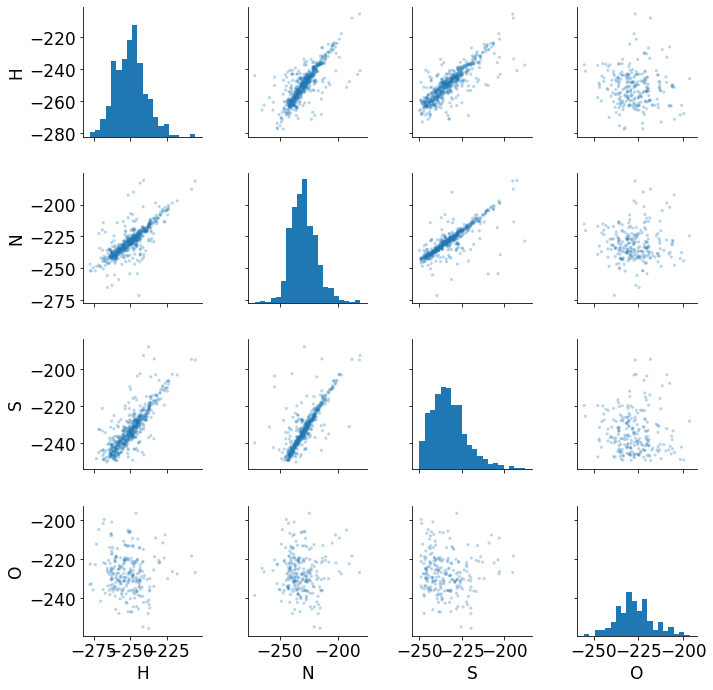

In [63]:
sns.pairplot(df, 
             vars=["H", "N", "S", "O"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="12"